In [89]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [90]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [91]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [92]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [93]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
41702,41703,49,blue-collar,casado,priamaria,no,-167,no,no,movil,51,7-jul-2021,1,-1,0,Sin Información,no
9757,9758,58,retired,casado,secundaria/superiores,no,1230,no,no,movil,420,20-may-2021,1,87,1,sin_exito,si
23869,23870,28,management,soltero,universitarios,no,466,si,no,movil,170,23-jul-2021,2,-1,0,Sin Información,no


In [94]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [95]:
# Reemplaza el valor erróneo en la columna 'educacion'
df['educacion'] = df['educacion'].replace('priamaria', 'primaria')


In [96]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
primaria                  6708
Name: count, dtype: int64


In [97]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
32196,46,blue-collar,casado,secundaria/superiores,no,4646,si,no,movil,33,3,359,1,sin_exito,no
37076,54,admin.,casado,secundaria/superiores,no,614,si,no,movil,322,2,343,2,sin_exito,no
25651,26,blue-collar,soltero,universitarios,no,644,no,no,movil,346,1,-1,0,Sin Información,si


In [98]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
576,57,0,73,2,-1,0,no,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6184,55,462,116,2,-1,0,no,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36268,51,1164,100,1,369,2,no,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
36816,36,4576,272,1,-1,0,no,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
30375,47,-59,502,1,343,2,no,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [99]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [101]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [102]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8594044477949491


In [103]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [104]:
# 'model' es tu modelo entrenado DecisionTreeClassifier y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

# Realiza la predicción utilizando el modelo entrenado
y_pred_base_datos = model.predict(X_base_datos)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos


In [105]:
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho
7350,7351,50,blue-collar,casado,primaria,no,12519,si,no,Sin Información,37,18-oct-2021,1,-1,0,Sin Información,no,no
38318,38319,28,services,casado,secundaria/superiores,no,7,no,no,movil,50,25-jul-2021,3,-1,0,Sin Información,no,no
21146,21147,34,technician,soltero,universitarios,no,2257,si,no,Sin Información,62,9-may-2021,1,-1,0,Sin Información,no,no


In [106]:
# Suponiendo que 'df' es tu DataFrame original con las columnas 'target' y 'predicciones'

# Contar los valores en la columna 'target'
conteo_target = df['target'].value_counts()

# Contar los valores en la columna 'predicciones'
conteo_predicciones = df['target_predicho'].value_counts()

# Imprimir los conteos
print("Conteo de valores en la columna 'target':")
print(conteo_target)
print("\nConteo de valores en la columna 'predicciones':")
print(conteo_predicciones)


Conteo de valores en la columna 'target':
target
no    37505
si     4941
Name: count, dtype: int64

Conteo de valores en la columna 'predicciones':
target_predicho
no    37409
si     5037
Name: count, dtype: int64


# Vamos a clasificar todas aquellas personas que tienen "si" en nuestra columna 'target' asi conoceremos mejor nuestros potenciales cliente

In [107]:
# Buscaremos usar un metodo jerarquico para poder agrupar las personas que tengan "si" en nuestra columna 'target'

df_cluster = df.drop(columns=['ID', 'tipo_contacto', 'duracion', 'fecha_contacto', 'campaign', 'tiempo_transcurrido', 'contactos_anteriores', 'resultado_campanas_anteriores'], inplace=False)

df_cluster.sample(3)


,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,target,target_predicho
5148,55,services,casado,secundaria/superiores,no,697,si,no,no,no
17653,33,management,soltero,universitarios,no,224,no,no,si,si
7711,55,services,casado,secundaria/superiores,no,879,no,no,no,no


In [108]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_cluster[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']])
a=onehot.transform(df_cluster[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_cluster.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_cluster_train=pd.concat([df_cluster,encoded_df],axis=1)

# Elimino la columna original antigua, la categórica
df_cluster_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','target','target_predicho'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_cluster_train.shape)
df_cluster_train.sample(5)

(42446, 30)


,edad,saldo,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,trabajo_housemaid,trabajo_management,trabajo_retired,trabajo_self-employed,trabajo_services,...,deuda_no,deuda_si,vivienda_no,vivienda_si,prestamo_no,prestamo_si,target_no,target_si,target_predicho_no,target_predicho_si
41218,35,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5716,44,-34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
18982,37,7974,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
30690,49,3728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
32004,30,1541,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [109]:
# Guardaremos nuestro modelo para poder aplicarlo en otra base de datos llamada Data_test


# Entrena tu modelo con los datos de entrenamiento
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Guarda el modelo entrenado en un archivo
joblib.dump(model, 'modelo_entrenado.pkl')

# Luego, en otro script o en otro momento cuando necesites usar el modelo entrenado:

# Carga el modelo entrenado desde el archivo
# model_cargado = joblib.load('modelo_entrenado.pkl')

# Ahora puedes usar el modelo cargado para hacer predicciones en tus nuevas bases de datos
# y_pred_base1 = model_cargado.predict(X_base1)
# y_pred_base2 = model_cargado.predict(X_base2)

['modelo_entrenado.pkl']

Curva de aprendizaje

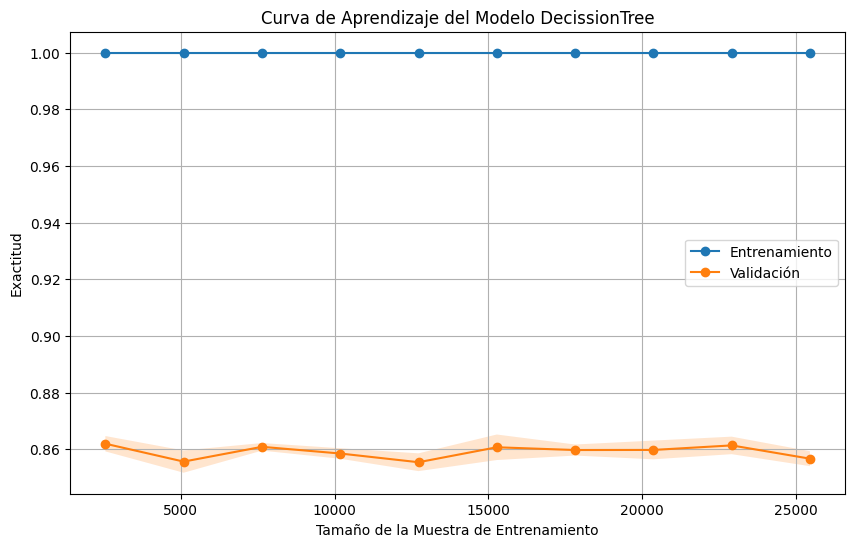

In [111]:
# Crear un objeto XGBoost

# Calcular la curva de aprendizaje
tamanos_muestra, puntajes_entrenamiento, puntajes_validacion = learning_curve(
    modelo, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calcular los puntajes medios y las desviaciones estándar
media_entrenamiento = np.mean(puntajes_entrenamiento, axis=1)
std_entrenamiento = np.std(puntajes_entrenamiento, axis=1)
media_validacion = np.mean(puntajes_validacion, axis=1)
std_validacion = np.std(puntajes_validacion, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(tamanos_muestra, media_entrenamiento, label='Entrenamiento', marker='o')
plt.fill_between(tamanos_muestra, media_entrenamiento - std_entrenamiento, media_entrenamiento + std_entrenamiento, alpha=0.2)
plt.plot(tamanos_muestra, media_validacion, label='Validación', marker='o')
plt.fill_between(tamanos_muestra, media_validacion - std_validacion, media_validacion + std_validacion, alpha=0.2)

# Configurar el gráfico
plt.title('Curva de Aprendizaje del Modelo DecissionTree')
plt.xlabel('Tamaño de la Muestra de Entrenamiento')
plt.ylabel('Exactitud')
plt.legend()
plt.grid(True)
plt.show()